In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('time-series-19-covid-combined.csv')  
print(data.head())
print(data.shape)

         Date Country/Region Province/State   Lat   Long  Confirmed  \
0  2020-01-22       Thailand            NaN  15.0  101.0        2.0   
1  2020-01-23       Thailand            NaN  15.0  101.0        3.0   
2  2020-01-24       Thailand            NaN  15.0  101.0        5.0   
3  2020-01-25       Thailand            NaN  15.0  101.0        7.0   
4  2020-01-26       Thailand            NaN  15.0  101.0        8.0   

   Recovered  Deaths  
0        0.0     0.0  
1        0.0     0.0  
2        0.0     0.0  
3        0.0     0.0  
4        2.0     0.0  
(31062, 8)


In [2]:
# category I Not Nan for 'Province/State' prediction
# category II Country/Region prediction
cat1_idx = data['Province/State'].notnull()
print(set(data['Province/State'][cat1_idx]))

{'Gansu', 'Lake, IL', 'Lee County, FL', 'Grafton County, NH', 'United States Virgin Islands', 'Hubei', 'Cherokee County, GA', 'Jefferson Parish, LA', 'Douglas County, CO', 'Essex, MA', 'Jackson County, OR', 'St Martin', 'Kittitas County, WA', 'Tulsa County, OK', 'Liaoning', 'Sint Maarten', 'South Australia', 'Oklahoma', 'King County, WA', 'Shaanxi', 'Vermont', 'Tasmania', 'Wisconsin', 'Western Australia', 'Worcester, MA', 'Washington, D.C.', 'Guangdong', 'Washington County, OR', 'Hong Kong', 'Denver County, CO', 'Beadle, SD', 'France', 'Wayne, MI', 'Jefferson, CO', 'Whatcom, WA', 'Okaloosa County, FL', 'Jefferson County, WA', 'Camden, NC', 'Providence County, RI', 'Chongqing', 'Wayne County, PA', 'Hebei', 'North Dakota', 'Island, WA', 'Orleans, LA', 'Pennsylvania', 'Nassau, FL', 'Heilongjiang', 'Jiangxi', 'Collier, FL', 'Marion County, OR', 'Faroe Islands', 'Guadeloupe', 'Marion County, IN', 'Prince Edward Island', 'Montana', 'Zhejiang', 'District of Columbia', 'Missouri', 'Klamath Cou

In [2]:
def pred_function(series, k=1):
    # Newton-Leibniz baseline
    # In 1665, following an outbreak of the bubonic plague in England, 
    # Cambridge University closed its doors, forcing Newton to return home and 
    # develop Differential calculus.
    # Leibniz's most prominent accomplishment was conceiving the ideas of differential and integral calculus, 
    # independently of Isaac Newton's contemporaneous developments.
    # Discrete backward derivative delta(x) = f(x) - f(x-1)
    # f(x+1)= delta(x)+f(x)
    
    delta = series[-1] - series[-2]
    pred = k*delta + series[-1]
    return pred

In [61]:
#testing historical data
idx_location = data['Country/Region']=="Italy"

dt_array_all = data['Date'][idx_location].to_numpy()
conf_array_all = data['Confirmed'][idx_location].to_numpy() 

for dt_idx in range(1,len(dt_array_all)):
    print(tmp_array_all[0:dt_idx+1])
    print(conf_array_all[0:dt_idx+1])
    print(tmp_array_all[dt_idx])

['2020-01-22' '2020-01-23']
[0. 0.]
2020-01-23
['2020-01-22' '2020-01-23' '2020-01-24']
[0. 0. 0.]
2020-01-24
['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25']
[0. 0. 0. 0.]
2020-01-25
['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26']
[0. 0. 0. 0. 0.]
2020-01-26
['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27']
[0. 0. 0. 0. 0. 0.]
2020-01-27
['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28']
[0. 0. 0. 0. 0. 0. 0.]
2020-01-28
['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29']
[0. 0. 0. 0. 0. 0. 0. 0.]
2020-01-29
['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30']
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
2020-01-30
['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
2020-01

In [79]:

tmp_date = dt_array_all[3]
print(tmp_date)

print((dt_array_all<dt_array_all[3]))

print(type((dt_array_all<dt_array_all[5])))

np.logical_and(dt_array_all<dt_array_all[3],dt_array_all<dt_array_all[5])
#cond_date = datetime.datetime.strptime(tmp_date, "%Y-%m-%d")

#[datetime.datetime.strptime(x, "%Y-%m-%d")<cond_date for x in dt_array_all]


2020-01-25
[ True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
<class 'numpy.ndarray'>


array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [4]:
for tmp_location in set(data['Province/State'][cat1_idx]):
    print(tmp_location)
    idx_location = data['Province/State']==tmp_location
    next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
    next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
    next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
    
    print(next_confirmed, next_recovered, next_deaths)
    

Gansu
136.0 114.0 2.0
Lake, IL
nan nan nan
Lee County, FL
nan nan nan
Grafton County, NH
nan nan nan
United States Virgin Islands
12.0 0.0 0.0
Hubei
67800.0 60325.0 3162.0
Cherokee County, GA
nan nan nan
Jefferson Parish, LA
nan nan nan
Douglas County, CO
nan nan nan
Essex, MA
nan nan nan
Jackson County, OR
nan nan nan
St Martin
4.0 0.0 0.0
Kittitas County, WA
nan nan nan
Tulsa County, OK
nan nan nan
Liaoning
128.0 124.0 2.0
Sint Maarten
1.0 0.0 0.0
South Australia
100.0 3.0 0.0
Oklahoma
67.0 0.0 2.0
King County, WA
nan nan nan
Shaanxi
248.0 239.0 3.0
Vermont
52.0 0.0 2.0
Tasmania
22.0 3.0 0.0
Wisconsin
381.0 0.0 4.0
Western Australia
120.0 0.0 1.0
Worcester, MA
nan nan nan
Washington, D.C.
nan nan nan
Guangdong
1419.0 1335.0 8.0
Washington County, OR
nan nan nan
Hong Kong
317.0 100.0 4.0
Denver County, CO
nan nan nan
Beadle, SD
nan nan nan
France
16018.0 2200.0 674.0
Wayne, MI
nan nan nan
Jefferson, CO
nan nan nan
Whatcom, WA
nan nan nan
Okaloosa County, FL
nan nan nan
Jefferson Count

In [5]:
cat2_idx = data['Province/State'].isnull()
print(set(data['Country/Region'][cat2_idx]))

{'Netherlands', 'Ukraine', 'Albania', 'Egypt', 'India', 'Sri Lanka', 'Oman', 'Uzbekistan', 'Antigua and Barbuda', 'Romania', 'Costa Rica', 'Latvia', 'Guyana', 'Congo (Brazzaville)', 'Algeria', 'Cuba', 'Ghana', 'Uruguay', 'Guatemala', 'Togo', 'Nigeria', 'Sudan', 'Mauritania', 'South Africa', 'Pakistan', 'Venezuela', 'Georgia', 'Vietnam', 'United Arab Emirates', 'Trinidad and Tobago', 'Turkey', 'Bosnia and Herzegovina', 'Andorra', 'Serbia', 'Curacao', 'Korea, South', 'Seychelles', 'Sweden', 'Eswatini', 'Cameroon', 'Hungary', 'Iraq', 'Panama', 'Belgium', 'New Zealand', 'Bolivia', 'Tunisia', 'Singapore', 'Cambodia', 'Paraguay', 'Iceland', 'Namibia', 'Suriname', 'Italy', 'Taiwan*', 'North Macedonia', 'Lithuania', 'Jersey', 'Honduras', 'Israel', 'Mexico', 'Mongolia', 'Brazil', 'Croatia', 'Brunei', 'Greece', 'Indonesia', 'Armenia', 'Morocco', 'Czechia', 'Liechtenstein', 'Finland', 'Nepal', 'occupied Palestinian territory', "Cote d'Ivoire", 'Senegal', 'Malta', 'Malaysia', 'Austria', 'Saint Luc

In [6]:
for tmp_location in set(data['Country/Region'][cat2_idx]):
    print(tmp_location)
    idx_location = data['Country/Region']==tmp_location
    next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
    next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
    next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
    
    print(next_confirmed, next_recovered, next_deaths)
    

Netherlands
1311 2 28
Ukraine
3 0 1
Albania
46 0 1
Egypt
111 15 2
India
124 22 2
Sri Lanka
26 1 0
Oman
25 9 0
Uzbekistan
2 0 0
Antigua and Barbuda
1 0 0
Romania
139 9 0
Costa Rica
28 0 0
Latvia
34 1 0
Guyana
7 0 1
Congo (Brazzaville)
2 0 0
Algeria
59 12 5
Cuba
4 0 0
Ghana
9 0 0
Uruguay
4 0 0
Guatemala
1 0 0
Togo
1 0 0
Nigeria
2 0 0
Sudan
1 0 1
Mauritania
1 0 0
South Africa
64 0 0
Pakistan
75 2 0
Venezuela
18 0 0
Georgia
36 0 0
Vietnam
59 16 0
United Arab Emirates
111 29 0
Trinidad and Tobago
2 0 0
Turkey
7 0 0
Bosnia and Herzegovina
30 0 0
Andorra
1 1 0
Serbia
50 0 0
Curacao
1 0 0
Korea, South
8238 510 78
Seychelles
2 0 0
Sweden
1083 1 4
Eswatini
1 0 0
Cameroon
2 0 0
Hungary
34 1 2
Iraq
122 26 10
Panama
50 0 1
Belgium
1083 1 4
New Zealand
10 0 0
Bolivia
10 0 0
Tunisia
18 0 0
Singapore
240 105 0
Cambodia
7 1 0
Paraguay
6 0 0
Iceland
186 15 10
Namibia
2 0 0
Suriname
1 0 0
Italy
28337 2704 2177
Taiwan*
65 20 1
North Macedonia
14 1 0
Lithuania
16 2 0
Jersey
2 0 0
Honduras
4 0 0
Israel
309 

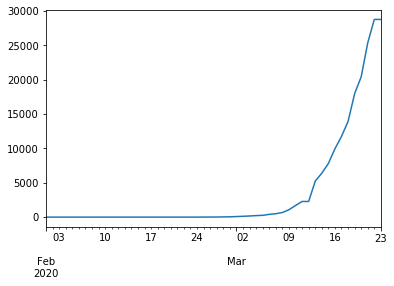

In [3]:
import datetime

offset = 10
tmp_location = "Spain"
idx_location = data['Country/Region']== tmp_location

dates = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in list(data['Date'][idx_location])]
cases = data['Confirmed'][idx_location].values

italy_dynamics = pd.Series(cases[offset:], index = dates[offset:])
italy_dynamics.plot()


real
[   0    0    0    0    0    0    0    0    0    0    1    1    1    1
    1    1    1    1    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    2    2    6   13   15   32   45   84  120  165
  222  259  400  500  673 1073 1695 2277 2277 5232 6391 7798]
prediction
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 20, 17, 49, 58, 123, 156, 210, 279, 296, 541, 600, 846, 1473, 2317, 2859, 2277, 8187, 7550, 9205]


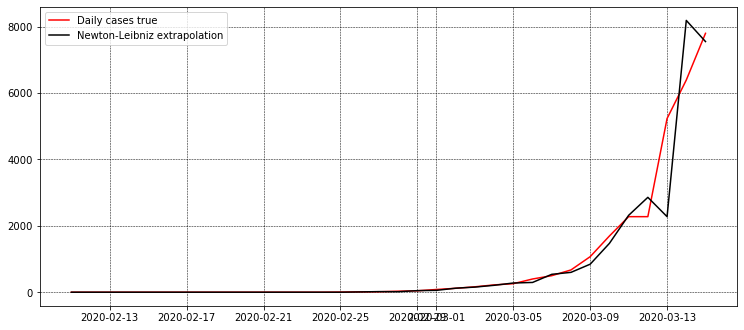

In [9]:
pred = [cases[0], cases[1]]
for i in range(2,len(cases)+1):
    #print(cases[0:i])
    #print("tmp pred")
    #print(pred_function(cases[0:i]))
    pred.append(pred_function(cases[0:i]))

print("real")
print(cases)
print("prediction")
print(pred)

offset = 20
plt.plot(dates[offset:], cases[offset:], 'r')

plt.plot(dates[offset:], pred[offset:-1], 'k')

fig = plt.gcf()
fig.set_size_inches(10.5, 5.5, forward=True)

plt.legend(('Daily cases true', 'Newton-Leibniz extrapolation'))
plt.grid(color='k', linestyle='--', linewidth=0.5)
fig.set_size_inches(12.5, 5.5, forward=True)
plt.show()



In [18]:
def mortality_estimate(data):
    # loop over countires and estimate ratio of predicted deaths and predicted confirmed cases
    
    cat2_idx = data['Province/State'].isnull()
    moratlity_list=[]
    for tmp_location in set(data['Country/Region'][cat2_idx]):
        idx_location = data['Country/Region']==tmp_location
        next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
        next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
        if next_confirmed > 0:
            next_mortality = next_deaths / next_confirmed 
            moratlity_list.append(next_mortality)
            
    cat1_idx = data['Province/State'].notnull()
    for tmp_location in set(data['Province/State'][cat1_idx]):

        idx_location = data['Province/State']==tmp_location
        next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
        next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
        next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
        if next_confirmed > 0:
            next_mortality = next_deaths / next_confirmed 
            moratlity_list.append(next_mortality)
    
    next_mortality_avg = np.average(np.asarray(moratlity_list))
    
    return next_mortality_avg


In [19]:
#export to CSV file .... 2day_prediction_12032020.csv
    
next_mortality_avg = moratlity_estimate(data)
print(next_mortality_avg)

from datetime import date
today = date.today()
file_str = "2day_prediction_" + str(today) + ".csv"
print(file_str)

next_pred_date = today+datetime.timedelta(days=2)
f = open(file_str,"w+")
#'Province/State, Country, prediction target date, N, varN, R, varR, D, varD, M, varM
#NaN, Switzerland, 14/03/2020, 1211, 1100-1400, 20, 10-60, 3, 3-5, 0.05, 0.01-0.1

f.write("Province/State, Country, prediction target date, N, varN, R, varR, D, varD, M, varM \n")

cat2_idx = data['Province/State'].isnull()
for tmp_location in set(data['Country/Region'][cat2_idx]):
    
    idx_location = data['Country/Region']==tmp_location
    next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
    next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
    next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
    
    
    loc1 = data['Province/State'][idx_location].iloc[0]
    loc2 = data['Country/Region'][idx_location].iloc[0]

    next_pred_date_str = str(next_pred_date)+","
    loc1_str = str(loc1).replace(',', ' ') + ","
    loc2_str = str(loc2).replace(',', ' ') + ","
    n_str = str(next_confirmed)+",nan,"
    r_str = str(next_recovered)+",nan,"
    d_str = str(next_deaths) + ",nan,"
    m_str = str(next_mortality_avg)+ ",nan\n"
    
    f.write(loc1_str+loc2_str+next_pred_date_str+n_str+r_str+d_str+m_str)

cat1_idx = data['Province/State'].notnull()
for tmp_location in set(data['Province/State'][cat1_idx]):

    idx_location = data['Province/State']==tmp_location
    next_confirmed = pred_function(data['Confirmed'][idx_location].to_numpy())
    next_recovered = pred_function(data['Recovered'][idx_location].to_numpy())
    next_deaths = pred_function(data['Deaths'][idx_location].to_numpy())
    
    loc1 = data['Province/State'][idx_location].iloc[0]
    loc2 = data['Country/Region'][idx_location].iloc[0]

    next_pred_date_str = str(next_pred_date)+","
    loc1_str = str(loc1).replace(',', ' ') + ","
    loc2_str = str(loc2).replace(',', ' ') + ","
    n_str = str(next_confirmed)+",nan,"
    r_str = str(next_recovered)+",nan,"
    d_str = str(next_deaths) + ",nan,"
    m_str = str(next_mortality_avg)+ ",nan\n"
    
    f.write(loc1_str+loc2_str+next_pred_date_str+n_str+r_str+d_str+m_str)
    
print("baseline predictions writtern to:"+file_str)   
f.close()

0.014021917284148361
2day_prediction_2020-03-16.csv
baseline predictions writtern to:2day_prediction_2020-03-16.csv


In [60]:
dt_array_all = data['Date'].to_numpy()[0:62]
print(dt_array_all)


['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31'
 '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05'
 '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10'
 '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15'
 '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20'
 '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25'
 '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23']


In [6]:
#historical predictions 
import datetime

dt_array_all = data['Date'].to_numpy()[0:62]
print(dt_array_all)
for dt_idx in range(1,len(dt_array_all)):
    
    k = 2
    pivot_today_str = dt_array_all[dt_idx]
    pivot_today = datetime.datetime.strptime( pivot_today_str, "%Y-%m-%d")
    file_str = str(k)+"day_prediction_" + pivot_today.strftime("%Y-%m-%d") + ".csv"
    print(file_str)

    next_pred_date = pivot_today + datetime.timedelta(days=k)
    f = open(file_str,"w+")
    #'Province/State, Country, prediction target date, N, varN, R, varR, D, varD, M, varM
    #NaN, Switzerland, 14/03/2020, 1211, 1100-1400, 20, 10-60, 3, 3-5, 0.05, 0.01-0.1

    f.write("Province/State, Country, prediction target date, N, varN, R, varR, D, varD, M, varM \n")

    cat2_idx = data['Province/State'].isnull()
    for tmp_location in set(data['Country/Region'][cat2_idx]):

        idx_location = data['Country/Region']==tmp_location
        #string comparions ... Y M D <= operator works
        idx_time = data['Date'] <= pivot_today_str
        conf_array_all = data['Confirmed'][idx_location & idx_time].to_numpy() 
        rec_array_all = data['Recovered'][idx_location & idx_time].to_numpy()
        dead_array_all = data['Deaths'][idx_location & idx_time].to_numpy()
        
        next_confirmed = pred_function(conf_array_all,k)
        next_recovered = pred_function(rec_array_all,k)
        next_deaths = pred_function(dead_array_all,k)
        loc1 = data['Province/State'][idx_location].iloc[0]
        loc2 = data['Country/Region'][idx_location].iloc[0]

        next_pred_date_str = str(next_pred_date)+","
        loc1_str = str(loc1).replace(',', ' ') + ","
        loc2_str = str(loc2).replace(',', ' ') + ","
        n_str = str(next_confirmed)+",,"
        r_str = str(next_recovered)+",,"
        d_str = str(next_deaths) + ",,"
        m_str = ",,\n"

        f.write(loc1_str+loc2_str+next_pred_date_str+n_str+r_str+d_str+m_str)

    cat1_idx = data['Province/State'].notnull()
    for tmp_location in set(data['Province/State'][cat1_idx]):

        idx_location = data['Province/State']==tmp_location
        #string comparions ... Y M D <= operator works
        idx_time = data['Date'] <= pivot_today_str
        conf_array_all = data['Confirmed'][idx_location & idx_time].to_numpy() 
        rec_array_all = data['Recovered'][idx_location & idx_time].to_numpy()
        dead_array_all = data['Deaths'][idx_location & idx_time].to_numpy()
        
        next_confirmed = pred_function(conf_array_all,k)
        next_recovered = pred_function(rec_array_all,k)
        next_deaths = pred_function(dead_array_all,k)

        loc1 = data['Province/State'][idx_location].iloc[0]
        loc2 = data['Country/Region'][idx_location].iloc[0]

        next_pred_date_str = str(next_pred_date)+","
        loc1_str = str(loc1).replace(',', ' ') + ","
        loc2_str = str(loc2).replace(',', ' ') + ","
        n_str = str(next_confirmed)+",,"
        r_str = str(next_recovered)+",,"
        d_str = str(next_deaths) + ",,"
        m_str = ",,\n"

        f.write(loc1_str+loc2_str+next_pred_date_str+n_str+r_str+d_str+m_str)

    print("baseline predictions writtern to:"+file_str)   
    f.close()


print("***END***")

    

['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31'
 '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05'
 '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10'
 '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15'
 '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20'
 '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25'
 '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23']
2day_prediction_2020-01-23.csv
baseline predictions writtern to:2day_prediction_2020-01-23.csv
2day_prediction_2020-01-24.csv
baseline predictions writtern to:2day_prediction_2020-

['2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25' '2020-01-26'
 '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30' '2020-01-31'
 '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04' '2020-02-05'
 '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09' '2020-02-10'
 '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14' '2020-02-15'
 '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19' '2020-02-20'
 '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24' '2020-02-25'
 '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29' '2020-03-01'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23']
